<a href="https://colab.research.google.com/github/tylereric24/NFL-Data-Science-Project/blob/main/Data_Science_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive')
#Step 1: Ask two questions
#Explorative:
#Is there a correlation between weather and football scores?
#Predictive:
#Does weather negatively affect superbowl scores? And can we determine if a game will be high scoring or low scoring given a temperature?


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [42]:
from zmq import NULL
#Step 2: Collect data
scores=pd.read_csv('/content/gdrive/MyDrive/Collab/Final/spreadspoke_scores.csv')
scores

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
0,9/2/1966,1966,1,False,Miami Dolphins,14.0,23.0,Oakland Raiders,NaN,NaN,NaN,Orange Bowl,False,83.0,6.0,71.0,NaN
1,9/3/1966,1966,1,False,Houston Oilers,45.0,7.0,Denver Broncos,NaN,NaN,NaN,Rice Stadium,False,81.0,7.0,70.0,NaN
2,9/4/1966,1966,1,False,San Diego Chargers,27.0,7.0,Buffalo Bills,NaN,NaN,NaN,Balboa Stadium,False,70.0,7.0,82.0,NaN
3,9/9/1966,1966,2,False,Miami Dolphins,14.0,19.0,New York Jets,NaN,NaN,NaN,Orange Bowl,False,82.0,11.0,78.0,NaN
4,9/10/1966,1966,1,False,Green Bay Packers,24.0,3.0,Baltimore Colts,NaN,NaN,NaN,Lambeau Field,False,64.0,8.0,62.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13499,1/8/2023,2022,18,False,Philadelphia Eagles,NaN,NaN,New York Giants,NaN,NaN,NaN,Lincoln Financial Field,False,NaN,NaN,NaN,NaN
13500,1/8/2023,2022,18,False,Pittsburgh Steelers,NaN,NaN,Cleveland Browns,NaN,NaN,NaN,Acrisure Stadium,False,NaN,NaN,NaN,NaN
13501,1/8/2023,2022,18,False,San Francisco 49ers,NaN,NaN,Arizona Cardinals,NaN,NaN,NaN,Levi's Stadium,False,NaN,NaN,NaN,NaN
13502,1/8/2023,2022,18,False,Seattle Seahawks,NaN,NaN,Los Angeles Rams,NaN,NaN,NaN,Lumen Field,False,NaN,NaN,NaN,NaN


In [43]:
scores=pd.read_csv('/content/gdrive/MyDrive/Collab/Final/spreadspoke_scores.csv')
#Step 3: Understand the data - Data size, format, encoding, granularity
from pathlib import Path
import os
import chardet
import pandas as pd
score_check = Path('/content/gdrive/MyDrive/Collab/Final/spreadspoke_scores.csv')
#weather_check = Path("/content/gdrive/MyDrive/Collab/Final/weather.csv", sep='\t')

#print(score_check)
date_format = '%m%d%Y'
print(f'File size violations: {os.path.getsize(score_check) / 1024:0.2f} KiB')
encodingV = chardet.detect(score_check.read_bytes())['encoding']
print(f'File encoding: {encodingV}')

#print(f'File size inspections {os.path.getsize(weather_check) / 1024:0.2f} KiB')
#encodingI = chardet.detect(weather_check.read_bytes())['encoding']
#print(f'File encoding: {encodingI}')


line = '{:<25} {:<10} {}'.format

# for each file, print its name, encoding & confidence in the encoding
print(line('File', 'Encoding', 'Confidence'))



#Step 3: Understand the data - Data cleaning
for filepath in Path('/content/gdrive/MyDrive/Collab/Final/').glob('*'):
    result = chardet.detect(filepath.read_bytes())
    print(line(str(filepath), result['encoding'], result['confidence']))


def parse_dates_and_years(df, column='Date'):
    dates = pd.to_datetime(df[column], format=date_format)
    years = dates.dt.year
    month = dates.dt.month
    day = dates.dt.day
    return df.assign(timestamp=dates, year=years, month = month,day = day)
#Step 4: Understand the world - Feature engineering
#scores['Date'] = pd.to_datetime(scores['Date']).dt.strftime('%m-%d-%Y')
#scores['Date'] = scores['Date'].str.replace('-','')
#scores = scores.pipe(parse_dates_and_years) 
#weather.pipe(fix_dates)

print("\nGranularity of each file: ")
print(scores.shape)
#print(weather.shape)
print("Number of unique ids:", len(scores['schedule_date'].unique()))
#print("Number of unique ids:", len(weather['Game'].unique()),"\n")
print(scores.describe())
print(scores.info())
#print(weather.describe())
#print(weather.info())
#weather
scores['weather_detail'].unique()

File size violations: 1438.22 KiB
File encoding: ascii
File                      Encoding   Confidence
/content/gdrive/MyDrive/Collab/Final/games.csv ascii      1.0
/content/gdrive/MyDrive/Collab/Final/stadium_coordinates.csv ascii      1.0
/content/gdrive/MyDrive/Collab/Final/spreadspoke_scores.csv ascii      1.0
/content/gdrive/MyDrive/Collab/Final/weather.csv ascii      1.0

Granularity of each file: 
(13504, 17)
Number of unique ids: 2529
       schedule_season    score_home    score_away  spread_favorite  \
count     13504.000000  13382.000000  13382.000000     10903.000000   
mean       1996.059908     22.454491     19.771708        -5.385628   
std          16.132924     10.531811     10.173899         3.437199   
min        1966.000000      0.000000      0.000000       -26.500000   
25%        1983.000000     15.000000     13.000000        -7.000000   
50%        1997.000000     22.000000     20.000000        -4.500000   
75%        2010.000000     29.000000     27.000000      

array([nan, 'DOME', 'Rain', 'Rain | Fog', 'Fog', 'Snow',
       'DOME (Open Roof)', 'Snow | Fog', 'Snow | Freezing Rain'],
      dtype=object)

In [44]:
#Reloading data for ease of access
scores=pd.read_csv('/content/gdrive/MyDrive/Collab/Final/spreadspoke_scores.csv')
#Feature engineering, we take the home and away score and add them into "total points" feature
scores["Total Points"] = scores['score_home'] + scores['score_away']
#Only a few games have no score, if they have no score they are of no use to us
scores = scores[scores["Total Points"].notna()]
#Only about 10 games have no Weather temperature, we will get rid of them too
scores = scores[scores["weather_temperature"].notna()]
#Convert our columns to integers 
scores = scores.astype({'weather_temperature':'int','Total Points':'int'})
#Our words to check
check = ['DOME','DOME (Open Roof)']
#Make a new feature that displays a 0 if no dome or 1 if there is a dome
scores['Dome'] = scores['weather_detail'].isin(check).astype(int)
#Drop un-wanted features
scores =scores.drop(["schedule_season","schedule_week","schedule_playoff","score_home","score_away","team_favorite_id","spread_favorite","stadium_neutral","weather_detail"], axis=1)
#Renaming columns
scores =scores.rename(columns={"stadium": "Stadium","schedule_date": "Date","team_home": "Home Team", "score_home": "Score Home", "team_away": "Away Team", "over_under_line": "O/U", "weather_temperature": "Temperature","weather_wind_mph": "Wind MPH", "weather_humidity": "Humidity",})
#ns = scores[scores["Humidity"].isna()]
#ns = ns[ns["Dome"]==0]
#We are going to use deductive imputation 
scores['Humidity'] = scores['Humidity'].fillna(67)
#ns = scores[scores["Wind MPH"].isna()].reset_index()
#If no wind date we don't mess up the average by filling it with 0
scores['Wind MPH'] = scores['Wind MPH'].fillna(0)

scores.info()
print(scores.describe())
scores.sort_values('Temperature')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12245 entries, 0 to 13374
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          12245 non-null  object 
 1   Home Team     12245 non-null  object 
 2   Away Team     12245 non-null  object 
 3   O/U           9986 non-null   object 
 4   Stadium       12245 non-null  object 
 5   Temperature   12245 non-null  int64  
 6   Wind MPH      12245 non-null  float64
 7   Humidity      12245 non-null  float64
 8   Total Points  12245 non-null  int64  
 9   Dome          12245 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 1.0+ MB
        Temperature      Wind MPH      Humidity  Total Points          Dome
count  12245.000000  12245.000000  12245.000000  12245.000000  12245.000000
mean      58.830543      7.700939     67.150837     42.041160      0.220335
std       15.529491      5.691664     13.105135     14.419133      0.414489
min      

,Date,Home Team,Away Team,O/U,Stadium,Temperature,Wind MPH,Humidity,Total Points,Dome
11601,1/10/2016,Minnesota Vikings,Seattle Seahawks,40,TCF Bank Stadium,-6,12.0,67.0,19,0
1265,12/10/1972,Denver Broncos,San Diego Chargers,NaN,Mile High Stadium,-5,7.0,52.0,51,0
5823,12/26/1993,Green Bay Packers,Los Angeles Raiders,32.5,Lambeau Field,-3,11.0,54.0,28,0
348,12/31/1967,Green Bay Packers,Dallas Cowboys,NaN,Lambeau Field,-2,15.0,55.0,38,0
1268,12/10/1972,Minnesota Vikings,Green Bay Packers,NaN,Metropolitan Stadium,-2,11.0,51.0,30,0
...,...,...,...,...,...,...,...,...,...,...
5407,9/13/1992,Phoenix Cardinals,Philadelphia Eagles,35,Sun Devil Stadium,92,7.0,30.0,45,0
12164,9/16/2018,Denver Broncos,Oakland Raiders,44,Sports Authority Field at Mile High,92,4.0,67.0,39,0
10839,9/15/2013,Tampa Bay Buccaneers,New Orleans Saints,48.5,Raymond James Stadium,93,8.0,47.0,30,0
7357,9/3/2000,Dallas Cowboys,Philadelphia Eagles,39.5,Texas Stadium,95,7.0,32.0,55,0


In [45]:
import plotly.express as px
#Step 3: Understand the data - Exploratory data analysis and visualization
sorted_sw = scores.sort_values('Wind MPH')
#Group by wind
meansw = sorted_sw.groupby('Wind MPH',as_index=False)['Total Points'].mean()
#meansw.rename(columns = {'Total Points':'Avg Total Pts'}, inplace = True)
fig = px.bar(meansw, x='Wind MPH', y='Total Points', title = "NFL Game Scores/Temps")
fig.show()
other_fig = px.scatter(meansw, x='Wind MPH', y='Total Points')
other_fig.show()

In [46]:
#Heat index using a formula online thought this would be a cool way to also check, we get similar results to heat except for the extreme values we had to remove
def heat_index(df):
  T = df['Temperature']
  rh = df['Humidity']
  heat = -42.379 + (2.04901523 * T) + (10.14333127 * rh) - (0.22475541 * T * rh)-(6.83783 * pow(10,-3)*pow(T,2)) -(5.481717 * pow(10,-2)*pow(rh,2)) + (1.22874 * pow(10,-3) * pow(T,2)*rh)+(8.5282 * pow(10,-4)*T*pow(rh,2))-(1.99*pow(10,-6)*pow(T,2)*pow(rh,2))
  heat = round(heat)
  return df.assign(heat_index = heat)
  

In [47]:
import plotly.express as px
#Step 3: Understand the data - Exploratory data analysis and visualization
scoresH = scores.pipe(heat_index)
scoresH = scoresH.rename(columns={"heat_index":"Heat Index"})
#Only accept values within our valid heat indexs for survivabilty, some heat index's did not calculate well
scoresH = scoresH[scoresH["Heat Index"]<100]
scoresH = scoresH[scoresH["Heat Index"]>55]
sorted_sw = scoresH.sort_values('Heat Index')
meansw = sorted_sw.groupby('Heat Index',as_index=False)['Total Points'].median()
#meansw.rename(columns = {'Total Points':'Avg Total Pts'}, inplace = True)
fig = px.bar(meansw, x='Heat Index', y='Total Points', title = "NFL Game Scores/Temps")
fig.show()
other_fig = px.scatter(meansw, x='Heat Index', y='Total Points')


other_fig.show()

In [48]:
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

df = pd.DataFrame(scoresH)
print(df)
x = df[['Wind MPH','Heat Index']]
y = scoresH['Total Points']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(x, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)



# split into inputs and outputs
X, y = scoresH[['Heat Index']], scoresH['Temperature']
print(X.shape, y.shape)
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# fit the model
model = RandomForestRegressor(random_state=1)
model.fit(X_train, y_train)
# make predictions
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

             Date           Home Team            Away Team   O/U  \
0        9/2/1966      Miami Dolphins      Oakland Raiders   NaN   
1        9/3/1966      Houston Oilers       Denver Broncos   NaN   
2        9/4/1966  San Diego Chargers        Buffalo Bills   NaN   
3        9/9/1966      Miami Dolphins        New York Jets   NaN   
4       9/10/1966   Green Bay Packers      Baltimore Colts   NaN   
...           ...                 ...                  ...   ...   
13355   11/3/2022      Houston Texans  Philadelphia Eagles  45.5   
13360   11/6/2022       Detroit Lions    Green Bay Packers  49.5   
13367   11/7/2022  New Orleans Saints     Baltimore Ravens    46   
13373  11/13/2022   Las Vegas Raiders   Indianapolis Colts    41   
13374  11/13/2022    Los Angeles Rams    Arizona Cardinals    38   

                 Stadium  Temperature  Wind MPH  Humidity  Total Points  Dome  \
0            Orange Bowl           83       6.0      71.0            37     0   
1           Rice Stad

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



MAE: 5.130


/usr/local/lib/python3.8/dist-packages/matplotlib/text.py:1165: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



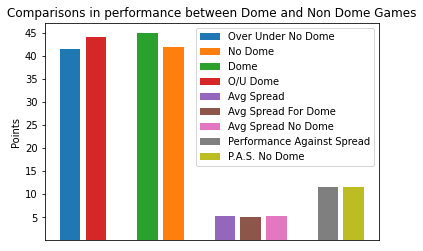

In [49]:
import numpy as np
import matplotlib.pyplot as plt

scoresou=pd.read_csv('/content/gdrive/MyDrive/Collab/Final/spreadspoke_scores.csv')

scoresou["Total Points"] = scoresou['score_home'] + scoresou['score_away']
#Only a few games have no score, if they have no score they are of no use to us
scoresou = scoresou[scoresou["Total Points"].notna()]
#Only about 10 games have no Weather temperature, we will get rid of them too
scoresou = scoresou[scoresou["weather_temperature"].notna()]
#Dropping games which have no Over Under Line
scoresou = scoresou[scoresou["over_under_line"].notna()]
#Dropping some stubborn rows that will not drop with previous line
scoresou['over_under_line'].replace('', np.nan, inplace=True)
scoresou = scoresou.drop(labels=[2725,3332,3565,3798,], axis=0)
#Convert our columns to integers 
scoresou = scoresou.astype({'weather_temperature':'int','Total Points':'int', 'over_under_line': float, 'spread_favorite': int})
#Our words to check
check = ['DOME','DOME (Open Roof)']
#Make a new feature that displays a 0 if no dome or 1 if there is a dome
scoresou['Dome'] = scoresou['weather_detail'].isin(check).astype(int)
#Drop un-wanted features
scoresou =scoresou.drop(["schedule_season","schedule_week","schedule_playoff","team_favorite_id","stadium_neutral","weather_detail"], axis=1)
#Renaming columns
scoresou =scoresou.rename(columns={"stadium": "Stadium","schedule_date": "Date","team_home": "Home Team", "spread_favorite": "Spread", "score_home": "Score Home", "score_away": "Score Away",  "team_away": "Away Team", "over_under_line": "O/U", "weather_temperature": "Temperature","weather_wind_mph": "Wind MPH", "weather_humidity": "Humidity",})



X = [np.arange(len(X))]
domeyes = (scoresou.loc[scoresou['Dome'] == 1, :])['Total Points'].mean()
domeno = (scoresou.loc[scoresou['Dome'] == 0, :])['Total Points'].mean()
oudome = (scoresou.loc[scoresou['Dome'] == 1, :])['O/U'].mean()
ounodome = (scoresou.loc[scoresou['Dome'] == 0, :])['O/U'].mean()
spreadavg = scoresou['Spread'].mean()
spreaddome = (scoresou.loc[scoresou['Dome'] == 1, :])['Spread'].mean()
spreadnodome = (scoresou.loc[scoresou['Dome'] == 0, :])['Spread'].mean()
scoresou['Performance Against Spread'] = scoresou['Score Home'] - scoresou['Score Away']
scoresou['Performance Against Spread'] = scoresou['Performance Against Spread'].abs()
spreadomep = (scoresou.loc[scoresou['Dome'] == 1, :])['Performance Against Spread'].mean()
spreadomenop = (scoresou.loc[scoresou['Dome'] == 0, :])['Performance Against Spread'].mean()

spreadavg = abs(spreadavg)
domespread = abs(spreaddome)
spreadnodome = abs(spreadnodome)

X_axis = np.arange(len(X))

plt.bar(X_axis + 0.5, ounodome, 0.4, label = 'Over Under No Dome')
plt.bar(X_axis + 2.5, domeno, 0.4, label = 'No Dome')
plt.bar(X_axis + 2.0, domeyes, 0.4, label = 'Dome')
plt.bar(X_axis + 1.0, oudome, 0.4, label = 'O/U Dome')
plt.bar(X_axis + 3.5, spreadavg, 0.4, label = 'Avg Spread')
plt.bar(X_axis + 4.0, domespread, 0.4, label = 'Avg Spread For Dome')
plt.bar(X_axis + 4.5, spreadnodome, 0.4, label = 'Avg Spread No Dome')
plt.bar(X_axis + 5.5, spreadomep, 0.4, label = 'Performance Against Spread')
plt.bar(X_axis + 6.0, spreadomenop, 0.4, label = 'P.A.S. No Dome')



plt.xticks(X_axis, X)
plt.yticks([5, 10, 15, 20, 25, 30, 35, 40, 45])
plt.xlabel("")
plt.ylabel("Points")
plt.title("Comparisons in performance between Dome and Non Dome Games")
plt.legend()
plt.show()

In [50]:
# Import library
import scipy.stats as stats
from scipy import stats
rng = np.random.default_rng()
 
# Creating data groups
data_group1 = (scoresou.loc[scoresou['Dome'] == 1, :])['Total Points']

data_group2 = (scoresou.loc[scoresou['Dome'] == 0, :])['Total Points']
 
# Print the variance of both data groups
print(np.var(data_group1), np.var(data_group2))
 
# Creating data groups
data_group1 = (scoresou.loc[scoresou['Dome'] == 1, :])['Total Points']
 
data_group2 = (scoresou.loc[scoresou['Dome'] == 0, :])['Total Points']
 
# Perform the two sample t-test with equal variances
stats.ttest_ind(a=data_group1, b=data_group2, equal_var=True)



203.2981489267482 204.1820532852204


Ttest_indResult(statistic=8.871696015796557, pvalue=8.439418216170981e-19)

In [51]:
#THIS IS EXTRA CODE WE USED AT THE START AND WE CHANGED 


#Step 3: Understand the data - Data cleaning
#weather = pd.read_csv("/content/gdrive/MyDrive/Collab/Final/weather.csv", sep='\t')
#weather = weather.drop([54], axis = 0)
#weather['Date'] = weather['Date'].str.replace('.','')
#weather['Date'] = weather['Date'].str.replace(',','')
#weather.rename(columns = {'City, stadium (bold if indoors)':'City'}, inplace = True)
#weather['City'] = weather['City'].str.split(",").str[0]
#weather['Kickoff temperature'] = weather['Kickoff temperature'].str.replace('°','')
#weather['Kickoff temperature'] = weather['Kickoff temperature'].str[0:2]
#weather
#Step 3: Understand the data - Data cleaning
#scores = scores.iloc[::-1].reset_index().drop(['index','SB'],axis = 1)
#scores['Total Points'] = scores['Winner Pts']+scores['Loser Pts']
#scores = scores.reset_index()
#scores.rename(columns = {'index':'Game'}, inplace = True)
#scores['Game']= scores['Game']+1
#del scores['Date']
#scores
#Step 3: Understand the data - Exploratory data analysis and visualization
#import plotly.express as px
#Step 4: Understand the world - Feature engineering
#mvp = sw.groupby(['MVP'])['MVP'].count()
#mvp = mvp.to_frame()
#mvp = mvp.rename(columns = {'MVP':'Wins'})
#print()
#mvp =mvp.reset_index().reset_index()
#mvp=mvp.merge(weather, left_on = 'index',right_on= 'Game')
#mvp = mvp.sort_values('Kickoff temperature',ascending = False).reset_index(drop = True)
#del mvp['index']

#mvp = mvp.sort_values('Wins',ascending = False).reset_index(drop = True)
#mvp
#Step 4: Understand the world - Feature engineering
#sw = scores.merge(weather)
#sw= sw[['Game','Date','Winner','MVP','Winner Pts','Loser Pts', 'Total Points','Kickoff temperature','Notes']]
#sw